In [ ]:
(33,[0,1,2,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32],[0.0034074649795667626,0.00413741447930873,0.174857215989406,0.01726154098338987,0.018280560101041142,0.002261726703313424,0.08072646083459825,0.0010372145781558167,0.02362677055121339,0.03755636073210255,0.0463249245397624,0.01734599372730481,0.12331213798904761,0.06190547590973885,0.1989891818023385,0.006474604848043193,0.0125853848245135,0.011429540857742782,0.031486710200181726,0.003055738160761083,0.003935933532905397,0.0010781704036437125,0.00647669744467106,0.002226334453365907,0.002085273761775174,0.0048787668115735025,0.004436802071339119,0.05430419992217015,0.0031644853312789334,0.04135091347574677])


In [2]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import random

In [20]:
def heatMapConfusion(cm,title):
    #cm = confusion_matrix(y_test,y_pred,labels=labels)
    plt.figure(figsize = (6,6))
    sns.heatmap(cm, annot=True,cmap="Blues",xticklabels=["0","1"] , yticklabels=["0","1"],fmt='g')
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(title)

## Data Understanding

#### Distribution of ClassLabel
- 1) Training Data

Text(0.5, 1.0, 'Distribution of classlabels in Training Set')

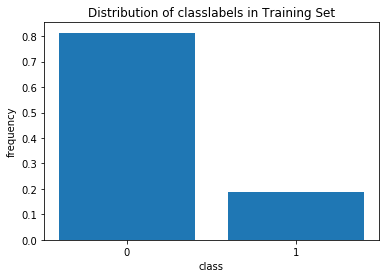

In [58]:
plt.bar(x=["0","1"], height=[26377/(26377+6051),6051/(26377+6051)], width=0.8)
plt.xlabel("class")
plt.ylabel("frequency")
plt.title("Distribution of classlabels in Training Set")

- 2) Test Data

Text(0.5, 1.0, 'Distribution of classlabels in Test Set')

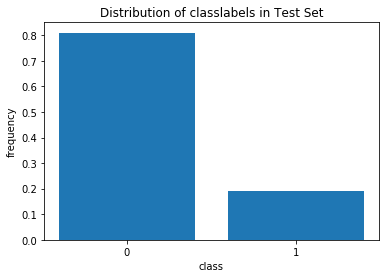

In [96]:
plt.bar(x=["0","1"], height=[26259/(26259+6168),6168/(26259+6168)], width=0.8)
plt.xlabel("class")
plt.ylabel("frequency")
plt.title("Distribution of classlabels in Test Set")

Text(0.5, 1.0, 'Testset')

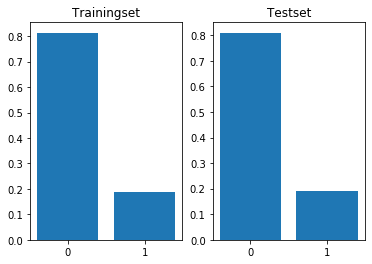

In [90]:
fig, (ax1,ax2) = plt.subplots(1, 2)
ax1.bar(x=["0","1"], height=[26377/(26377+6051),6051/(26377+6051)], width=0.8)
ax1.set_title('Trainingset')
ax2.bar(x=["0","1"], height=[26259/(26259+6168),6168/(26259+6168)], width=0.8)
ax2.set_title('Testset')


# Evaluation

#### First naive run of decision tree

- Base Revenue = 26259 * 1.5 € - 6168 * 5 € = 8548.5 €

In [142]:
baseRevenue = 26259 * 1.5  - 6168 * 5

Base Revenue: 8548.50 €
Generated Revenue: 8552.00 €
Improvement: 0.04093 %
Accuracy: 81.00 %


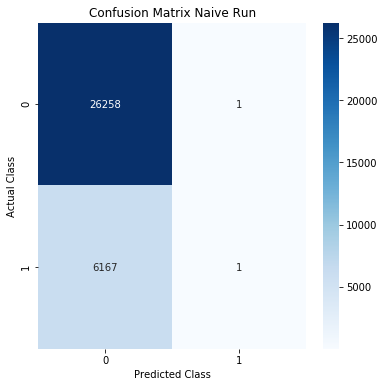

In [126]:
confMatrix = np.array([[26258,1],
                         [6167,1]])
revenue = confMatrix[0,0] * 1.5 + confMatrix[1,0] * (-5)
heatMapConfusion(confMatrix, "Confusion Matrix Naive Run")
print("Base Revenue: {0:.2f} €" .format(baseRevenue))
print("Generated Revenue: {0:.2f} €" .format(revenue))
print("Improvement: {0:.5f} %" .format((1-(baseRevenue)/(float(revenue))) * 100))
print("Accuracy: {0:.2f} %" .format(81))

- Tree has accuracy of ca. 81 % -> Metric Trap
- Tree always predicts class 0. Ca. 81 % of the values in the test set are 0.

### Solution: Oversampling of minority class

#### Distribution after oversampling in train set
- 0: 26377 Lables
- 1: 26671 Labels
- now nearly equally distributed

Text(0.5, 1.0, 'Distribution of classlabels in Test Set')

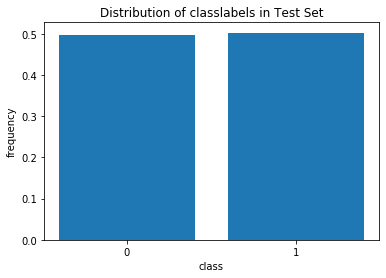

In [129]:
plt.bar(x=["0","1"], height=[26377/(26377+26671),26671/(26377+26671)], width=0.8)
plt.xlabel("class")
plt.ylabel("frequency")
plt.title("Distribution of classlabels in Test Set")

#### now nearly equally distributed

### Oversampling: Simple Decision Tree with all preprocessed features 

- maxDepth = 5
- Training Model and make predictions: 8.707 sec

Base Revenue: 8548.50 €
Generated Revenue: 11520.00 €
Improvement: 25.794 %


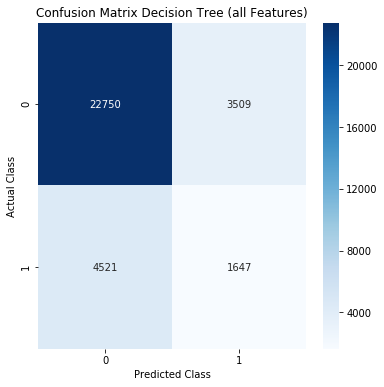

In [138]:
confMatrix = np.array([[22750,3509],
                         [4521,1647]])
revenue = confMatrix[0,0] * 1.5 + confMatrix[1,0] * (-5)
heatMapConfusion(confMatrix, "Confusion Matrix Decision Tree (all Features)")
print("Base Revenue: {0:.2f} €" .format(baseRevenue))
print("Generated Revenue: {0:.2f} €" .format(revenue))
print("Improvement: {0:.3f} %" .format((1-(baseRevenue)/(float(revenue))) * 100))

#### Oversampling: RandomForestClassifier with all preprocessed features 

- without tuning of hyperparameters
- Training Model and make predictions: 8.901 sec

Base Revenue: 8548.50 €
Generated Revenue: 11130.50 €
Improvement: 23.198 %


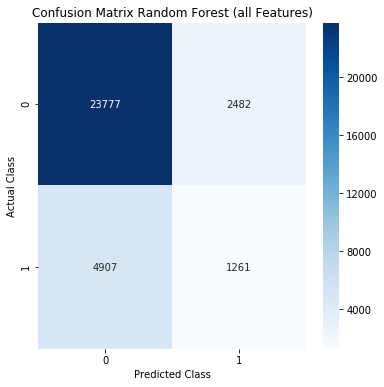

In [139]:
confMatrix = np.array([[23777,2482],
                         [4907,1261]])
revenue = confMatrix[0,0] * 1.5 + confMatrix[1,0] * (-5)
heatMapConfusion(confMatrix, "Confusion Matrix Random Forest (all Features)")
print("Base Revenue: {0:.2f} €" .format(baseRevenue))
print("Generated Revenue: {0:.2f} €" .format(revenue))
print("Improvement: {0:.3f} %" .format((1-(baseRevenue)/(float(revenue))) * 100))